<a href="https://colab.research.google.com/github/akbarunpam/akbarunpam/blob/main/DataMining2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Download Dataset**

In [ ]:
!pip install -q kaggle

Uploaded kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

Processing Download

In [ ]:
!kaggle datasets download -d genshinplayer/genshin-impact-characters-stats

  0% 0.00/6.40k [00:00<?, ?B/s]
100% 6.40k/6.40k [00:00<00:00, 11.9MB/s]


In [ ]:
!mkdir /content/genshindataset
import zipfile
with zipfile.ZipFile('genshin-impact-characters-stats.zip', 'r') as zip_ref:zip_ref.extractall('/content/genshindataset')

**2. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
pwd

'/content'

**3. Load & Display Dataset**

In [ ]:
# membaca file CSV yang disimpan di lokasi "/content/bodydataset/bdims.csv", menyimpannya dalam sebuah DataFrame Pandas, dan kemudian menampilkan DataFrame tersebut

df = pd.read_csv("/content/genshindataset/Genshin_Impact_All_Character_Stat.csv")
# print("Semua data:\n")
# display(df)

print("1. Dua record pertama:\n")
display(df.head(2))

print("\n\n\n2. Dua record terakhir:\n")
display(df.tail(2))

print("\n\n\n3. Empat record acak:\n")
display(df.sample(4))

1. Dua record pertama:



,Character,Lv,Rarity,Element,Weapon,Main role,Ascension,Base HP,Base ATK,Base DEF
0,Amber,1,4,Pyro,Bow,Sub DPS,ATK,793,19,50
1,Amber,20,4,Pyro,Bow,Sub DPS,ATK,2038,48,129





2. Dua record terakhir:



,Character,Lv,Rarity,Element,Weapon,Main role,Ascension,Base HP,Base ATK,Base DEF
572,Kokomi,80,5,Hydro,Catalyst,Healer,Hydro DMG,12524,218,611
573,Kokomi,90,5,Hydro,Catalyst,Healer,Hydro DMG,13471,234,657





3. Empat record acak:



,Character,Lv,Rarity,Element,Weapon,Main role,Ascension,Base HP,Base ATK,Base DEF
405,Rosaria,90,4,Cryo,Polearm,DPS,ATK,12289,240,710
21,Barbara,60,4,Hydro,Catalyst,Healer,HP,6448,105,441
361,Xinyan,80,4,Pyro,Claymore,Support,ATK,9927,220,708
336,Diona,1,4,Cryo,Bow,Support,Cryo DMG,802,18,50


**3.1 The shape of the dataset**

In [ ]:
# Check the shape before dop duplicate
df.shape

(574, 10)

**3.2 List types of all columns**

In [ ]:
df.dtypes

Character    object
Lv            int64
Rarity        int64
Element      object
Weapon       object
Main role    object
Ascension    object
Base HP       int64
Base ATK      int64
Base DEF      int64
dtype: object

**3.3 Info of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Character  574 non-null    object
 1   Lv         574 non-null    int64 
 2   Rarity     574 non-null    int64 
 3   Element    574 non-null    object
 4   Weapon     574 non-null    object
 5   Main role  574 non-null    object
 6   Ascension  574 non-null    object
 7   Base HP    574 non-null    int64 
 8   Base ATK   574 non-null    int64 
 9   Base DEF   574 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 45.0+ KB


**3.4 Summary of the dataset**

In [ ]:
df.describe()

,Lv,Rarity,Base HP,Base ATK,Base DEF
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,52.214286,4.512195,6860.010453,148.527875,423.303136
std,24.996567,0.500287,3325.201592,77.011853,202.560931
min,1.000000,4.000000,763.000000,8.000000,48.000000
25%,40.000000,4.000000,4405.000000,91.250000,276.000000
50%,55.000000,5.000000,6942.500000,148.000000,431.000000
75%,70.000000,5.000000,9280.000000,200.750000,575.000000
max,90.000000,5.000000,15552.000000,349.000000,922.000000


**Check the null value**

**4. Data Cleaning**

**4.1 DRP the duplicate**

In [ ]:
df.shape

(574, 10)

In [ ]:
df = df.drop_duplicates()

**4.2 Check the NULL value**

In [ ]:
df.isnull().sum()

Character    0
Lv           0
Rarity       0
Element      0
Weapon       0
Main role    0
Ascension    0
Base HP      0
Base ATK     0
Base DEF     0
dtype: int64

In [ ]:
df.columns

Index(['Character', 'Lv', 'Rarity', 'Element', 'Weapon', 'Main role',
       'Ascension', 'Base HP', 'Base ATK', 'Base DEF'],
      dtype='object')

**Check the no of zero value in dataset**

In [ ]:
print("- No of zero value in Character: ", df[df["Character"] == 0].shape[0])
print("- No of zero value in Level: ", df[df["Lv"] == 0].shape[0])
print("- No of zero value in Rarity: ", df[df["Rarity"] == 0].shape[0])
print("- No of zero value in Element: ", df[df["Element"] == 0].shape[0])
print("- No of zero value in Weapon: ", df[df["Weapon"] == 0].shape[0])
print("- No of zero value in Main role: ", df[df["Main role"] == 0].shape[0])
print("- No of zero value in Ascension: ", df[df["Ascension"] == 0].shape[0])
print("- No of zero value in Base HP: ", df[df["Base HP"] == 0].shape[0])
print("- No of zero value in Base ATK: ", df[df["Base ATK"] == 0].shape[0])
print("- No of zero value in Base DEF: ", df[df["Base DEF"] == 0].shape[0])

- No of zero value in Character:  0
- No of zero value in Level:  0
- No of zero value in Rarity:  0
- No of zero value in Element:  0
- No of zero value in Weapon:  0
- No of zero value in Main role:  0
- No of zero value in Ascension:  0
- No of zero value in Base HP:  0
- No of zero value in Base ATK:  0
- No of zero value in Base DEF:  0


**Replace the no of zero value with mean of columns**

In [ ]:
# df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
# print("- No of zero value in Glucose: ", df[df["Glucose"] == 0].shape[0])
# df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
# print("- No of zero value in BloodPressure: ", df[df["BloodPressure"] == 0].shape[0])
# df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())
# print("- No of zero value in SkinThickness: ", df[df["SkinThickness"] == 0].shape[0])
# df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
# print("- No of zero value in Insulin: ", df[df["Insulin"] == 0].shape[0])
# df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
# print("- No of zero value in BMI: ", df[df["BMI"] == 0].shape[0])

In [ ]:
df.describe();

ValueError: 'explode' must be of length 'x'

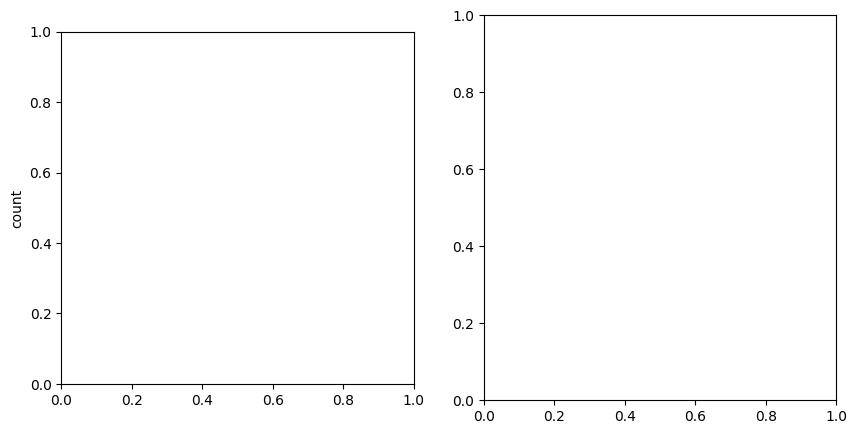

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))
df["Character"].value_counts().plot.pie(explode = [0, 0.1],
    autopct = "%1.1f%%",
    ax = ax[0],
    shadow = True
)
ax[0].set_title("Character")
ax[0].set_ylabel("")
sns.countplot(x = "Character", data = df, ax = ax[1])
ax[1].set_title("Character")
N, P = df["Character"].value_counts()
print("- Negative(0) : ", N)
print("- Positive(1) : ", P)
plt.grid()
plt.show()

Histogram of aech feature
**bold text**

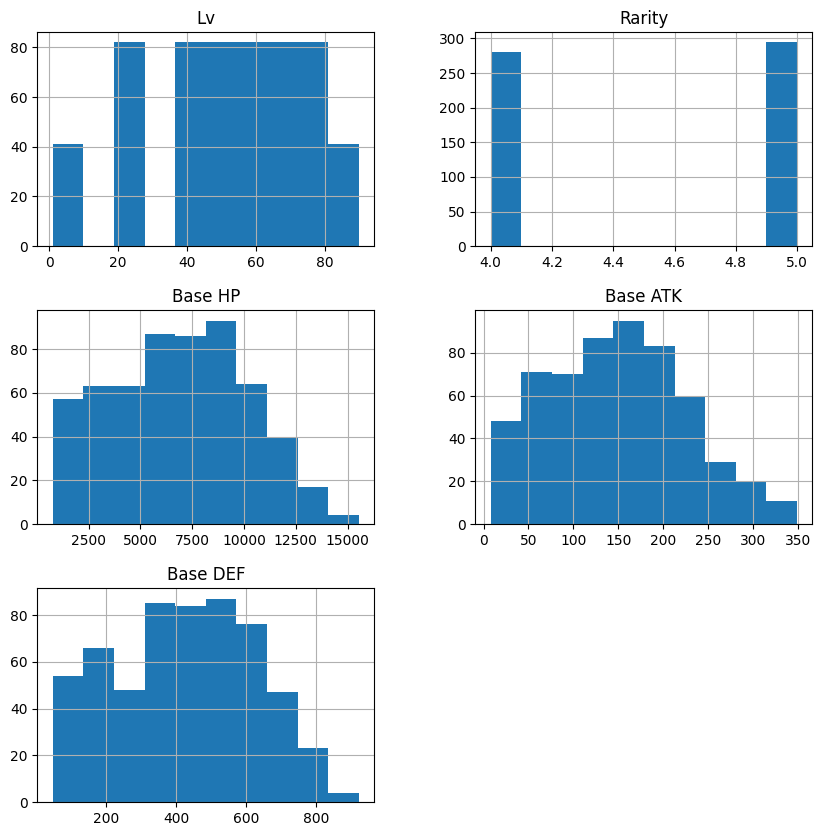

In [ ]:
df.hist(bins = 10, figsize = (10, 10))
plt.show()